<a href="https://colab.research.google.com/github/sarthakpant772/MLnow_2.0/blob/main/placement_knn(classification).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/mashine_learning_models/palcement_knn(classification)


/content/drive/MyDrive/mashine_learning_models/palcement_knn(classification)


In [3]:
ls

Placement_Data_Full_Class.csv  Untitled0.ipynb


In [49]:
import pandas as pd
import numpy as np
import os

In [86]:
placement_data=pd.read_csv('Placement_Data_Full_Class.csv')

In [87]:
placement_data.head(10)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.00,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.50,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.00,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.00,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.80,Mkt&Fin,55.50,Placed,425000.0
5,6,M,55.00,Others,49.80,Others,Science,67.25,Sci&Tech,Yes,55.00,Mkt&Fin,51.58,Not Placed,NaN
6,7,F,46.00,Others,49.20,Others,Commerce,79.00,Comm&Mgmt,No,74.28,Mkt&Fin,53.29,Not Placed,NaN
7,8,M,82.00,Central,64.00,Central,Science,66.00,Sci&Tech,Yes,67.00,Mkt&Fin,62.14,Placed,252000.0
8,9,M,73.00,Central,79.00,Central,Commerce,72.00,Comm&Mgmt,No,91.34,Mkt&Fin,61.29,Placed,231000.0
9,10,M,58.00,Central,70.00,Central,Commerce,61.00,Comm&Mgmt,No,54.00,Mkt&Fin,52.21,Not Placed,NaN


#Data Cleaning

In [88]:
placement_data.columns

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status', 'salary'],
      dtype='object')

In [89]:
print(f'gender:{placement_data.gender.unique()}')
print(f'ssc_b:{placement_data.ssc_b.unique()}')
print(f'hsc_b:{placement_data.hsc_b.unique()}')
print(f'hsc_s:{placement_data.hsc_s.unique()}')
print(f'degree_t:{placement_data.degree_t.unique()}')
print(f'workx:{placement_data.workex.unique()}')
print(f'specialization:{placement_data.specialisation.unique()}')
print(f'status:{placement_data.status.unique()}')






gender:['M' 'F']
ssc_b:['Others' 'Central']
hsc_b:['Others' 'Central']
hsc_s:['Commerce' 'Science' 'Arts']
degree_t:['Sci&Tech' 'Comm&Mgmt' 'Others']
workx:['No' 'Yes']
specialization:['Mkt&HR' 'Mkt&Fin']
status:['Placed' 'Not Placed']


In [90]:
placement_data['gender']=placement_data['gender'].apply({'M':1,'F':2}.get)
placement_data['ssc_b']=placement_data['ssc_b'].apply({'Others':1,'Central':2}.get)
placement_data['hsc_b']=placement_data['hsc_b'].apply({'Others':1,'Central':2}.get)
placement_data['hsc_s']=placement_data['hsc_s'].apply({'Commerce':1,'Science':2, 'Arts':3 }.get)
placement_data['degree_t']=placement_data['degree_t'].apply({'Sci&Tech':1,'Comm&Mgmt':2 , 'Others':3}.get)
placement_data['workex']=placement_data['workex'].apply({'No':1,'Yes':2}.get)
placement_data['specialisation']=placement_data['specialisation'].apply({'Mkt&HR':1,'Mkt&Fin':2}.get)
placement_data['status']=placement_data['status'].apply({'Placed':1,'Not Placed':2}.get)


In [91]:
placement_data.head(7)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,1,67.00,1,91.00,1,1,58.00,1,1,55.00,1,58.80,1,270000.0
1,2,1,79.33,2,78.33,1,2,77.48,1,2,86.50,2,66.28,1,200000.0
2,3,1,65.00,2,68.00,2,3,64.00,2,1,75.00,2,57.80,1,250000.0
3,4,1,56.00,2,52.00,2,2,52.00,1,1,66.00,1,59.43,2,NaN
4,5,1,85.80,2,73.60,2,1,73.30,2,1,96.80,2,55.50,1,425000.0
5,6,1,55.00,1,49.80,1,2,67.25,1,2,55.00,2,51.58,2,NaN
6,7,2,46.00,1,49.20,1,1,79.00,2,1,74.28,2,53.29,2,NaN


In [92]:
placement_data.fillna(0)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,1,67.00,1,91.00,1,1,58.00,1,1,55.0,1,58.80,1,270000.0
1,2,1,79.33,2,78.33,1,2,77.48,1,2,86.5,2,66.28,1,200000.0
2,3,1,65.00,2,68.00,2,3,64.00,2,1,75.0,2,57.80,1,250000.0
3,4,1,56.00,2,52.00,2,2,52.00,1,1,66.0,1,59.43,2,0.0
4,5,1,85.80,2,73.60,2,1,73.30,2,1,96.8,2,55.50,1,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,1,80.60,1,82.00,1,1,77.60,2,1,91.0,2,74.49,1,400000.0
211,212,1,58.00,1,60.00,1,2,72.00,1,1,74.0,2,53.62,1,275000.0
212,213,1,67.00,1,67.00,1,1,73.00,2,2,59.0,2,69.72,1,295000.0
213,214,2,74.00,1,66.00,1,1,58.00,2,1,70.0,1,60.23,1,204000.0


In [93]:
print(placement_data.columns)

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status', 'salary'],
      dtype='object')


In [94]:
clean_placement=placement_data[[ 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status', ]]

In [95]:
clean_placement.to_csv('cleandata.csv')

#EDA

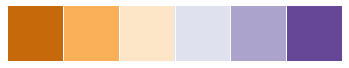

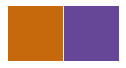

In [96]:

import matplotlib.pyplot as plt
import seaborn as sns
sns.palplot(sns.color_palette("PuOr"))
pal = sns.color_palette('PuOr', 6)
pal.as_hex()
plt.style.use(['seaborn'])
sns_colors = ["#c6690c", "#664697"]
sns.set_palette(sns_colors)
sns.palplot(sns.color_palette(sns_colors))

In [97]:
print(clean_placement.columns)

Index(['gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s', 'degree_p',
       'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p', 'status'],
      dtype='object')


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


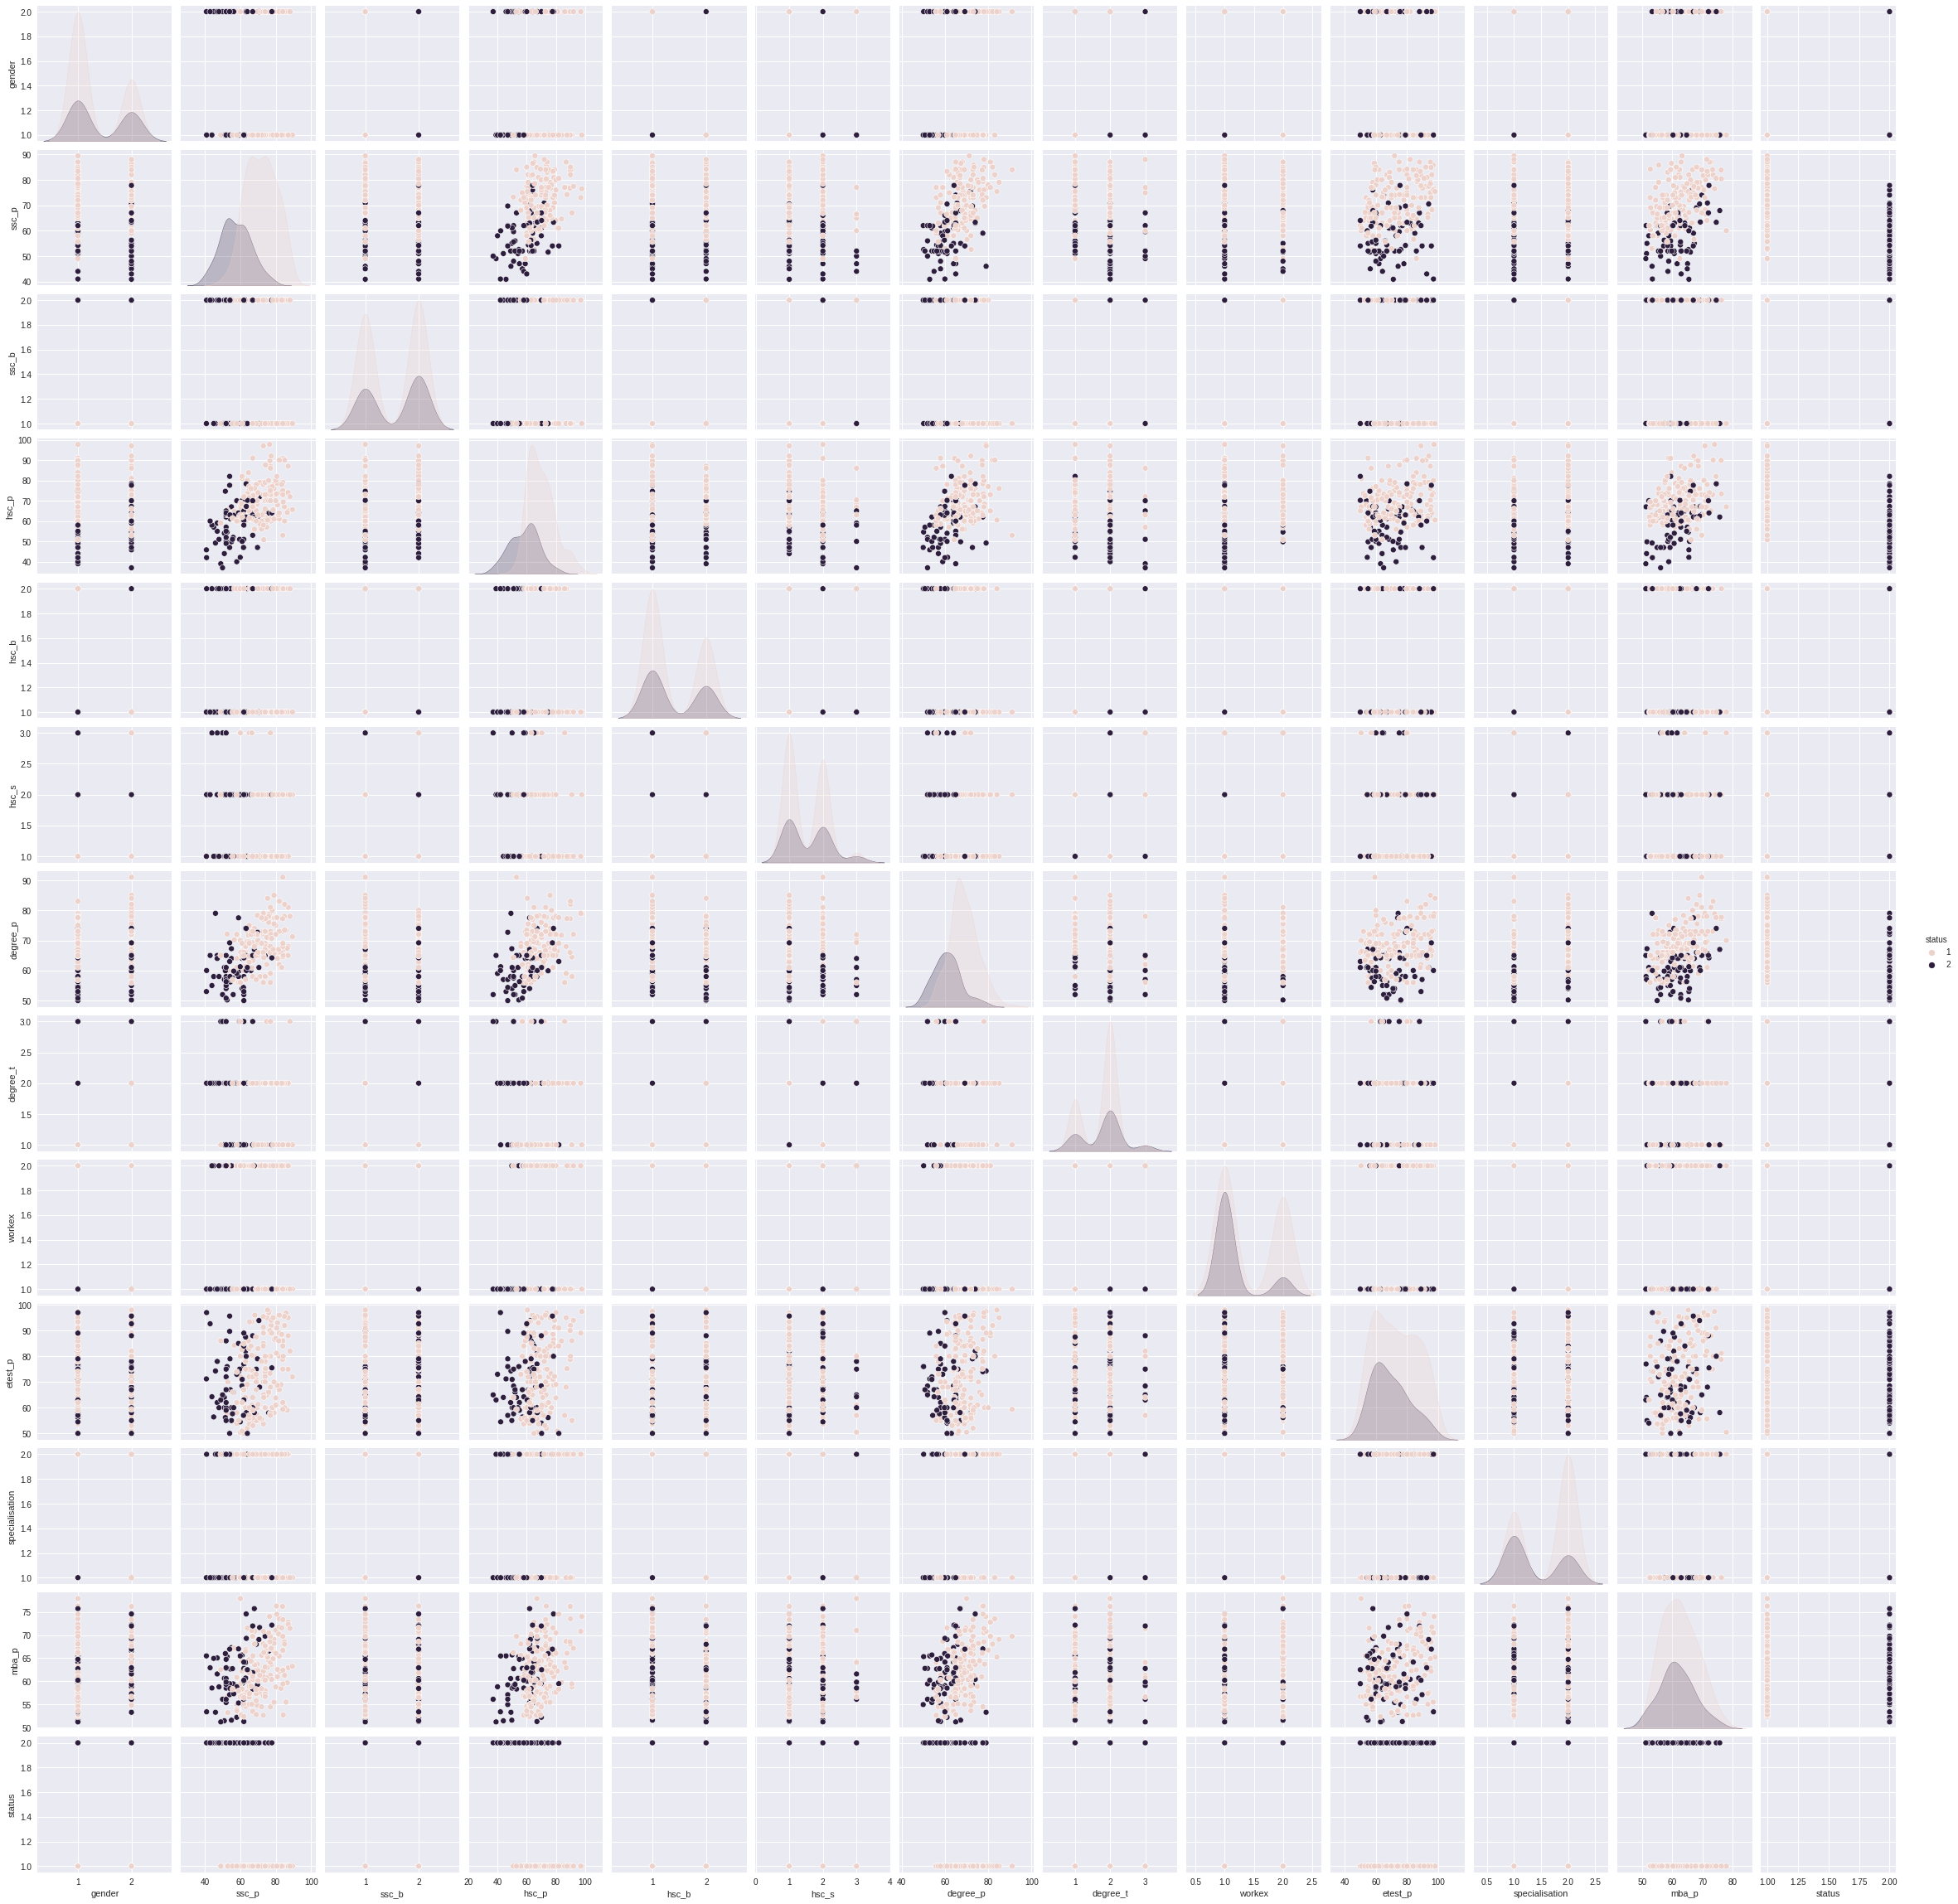

In [98]:
sns.pairplot(clean_placement,
        x_vars=['gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s', 'degree_p','degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p','status'],
        y_vars=['gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s', 'degree_p','degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p','status'],
        hue='status',
        diag_kind='kde'
)

## Analysis of data 


## Data spliting 

In [99]:
train_x=clean_placement.sample(frac=0.75 , random_state=0)
test_x=clean_placement.drop(train_x.index)


,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
198,2,67.0,2,70.0,2,1,65.0,3,1,88.00,1,71.96,2
37,2,79.0,2,76.0,2,2,65.6,1,1,58.00,1,55.47,1
89,2,84.0,1,75.0,1,2,69.0,1,2,62.00,1,62.36,1
168,2,48.0,2,51.0,2,1,58.0,2,2,60.00,1,58.79,2
171,1,80.0,1,80.0,1,1,72.0,2,2,63.79,2,66.04,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
42,1,49.0,1,39.0,2,2,65.0,3,1,63.00,2,51.21,2
105,1,59.0,2,64.0,1,2,58.0,1,1,85.00,1,55.30,2
132,1,67.0,1,68.0,1,1,64.0,2,2,74.40,1,53.49,1
186,2,52.0,2,64.0,2,1,61.0,2,1,55.00,2,62.93,2


In [100]:
test_y=test_x.pop('status')
train_y=train_x.pop('status')

In [101]:
print(train_x)


     gender  ssc_p  ssc_b  hsc_p  ...  workex  etest_p  specialisation  mba_p
198       2   67.0      2   70.0  ...       1    88.00               1  71.96
37        2   79.0      2   76.0  ...       1    58.00               1  55.47
89        2   84.0      1   75.0  ...       2    62.00               1  62.36
168       2   48.0      2   51.0  ...       2    60.00               1  58.79
171       1   80.0      1   80.0  ...       2    63.79               2  66.04
..      ...    ...    ...    ...  ...     ...      ...             ...    ...
42        1   49.0      1   39.0  ...       1    63.00               2  51.21
105       1   59.0      2   64.0  ...       1    85.00               1  55.30
132       1   67.0      1   68.0  ...       2    74.40               1  53.49
186       2   52.0      2   64.0  ...       1    55.00               2  62.93
17        2   55.0      2   67.0  ...       1    60.00               2  67.28

[161 rows x 12 columns]


#Problem statement

## find if the person will get placed or not depending on its past activities

In [102]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=9, p=2,metric='minkowski')

classifier=classifier.fit(train_x,train_y)

In [103]:
y_test_pridict=classifier.predict(test_x)

In [104]:
y_train_pred=classifier.predict(train_x)

In [106]:
from sklearn.metrics import accuracy_score

accuracy_score(test_y, y_test_pridict )*100

77.77777777777779